In [1]:
import numpy as np

In [2]:
import pandas as pd

In [49]:
import matplotlib.pyplot as plt
import math

In [4]:
data1 = pd.read_csv('output_nt_Tracker1.csv', comment='#', \
names=['EventID', 'Phi', 'Theta'])

In [5]:
data2 = pd.read_csv('output_nt_Tracker2.csv', comment='#', \
names=['EventID', 'Phi', 'Theta'])

In [6]:
truth = pd.read_csv('output_nt_Truth.csv', comment='#', \
names=['EventID', 'Phi', 'Theta', 'momentum'])

### Get the simulation working. Process all 1000 input events. [1 mark]

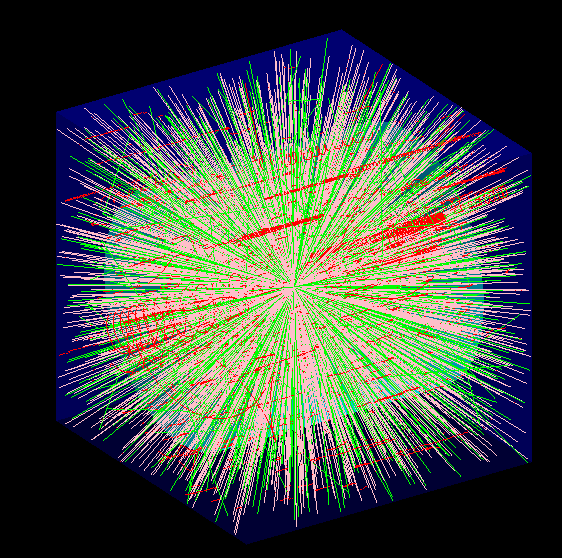

In [23]:
from IPython.display import Image
display(Image(filename='cp11.png'))

### Using the event ID, print the number of true particles, layer one hits, and layer two hits in each event. [1 mark]

In [8]:
truth.groupby('EventID').count()

,Phi,Theta,momentum
EventID,,,
0,2,2,2
1,2,2,2
2,2,2,2
3,2,2,2
4,2,2,2
...,...,...,...
995,2,2,2
996,2,2,2
997,2,2,2


In [9]:
data1.groupby('EventID').count()

,Phi,Theta
EventID,,
1,2,2
2,2,2
3,2,2
4,34,34
5,2,2
...,...,...
994,2,2
995,19,19
997,2,2


In [44]:
data2.groupby('EventID').count()

,Phi,Theta
EventID,,
0,1,1
1,7,7
2,2,2
3,6,6
4,2,2
...,...,...
994,2,2
995,2,2
997,2,2


In [47]:
#for all event numbers get count from tracker 1 and 2
for i in range(1000):
    print('event',i,': layer one hits',data1[data1.EventID ==i].count()[0],'layer two hits',data2[data2.EventID ==i].count()[0])

event 0 : layer one hits 0 layer two hits 1
event 1 : layer one hits 2 layer two hits 7
event 2 : layer one hits 2 layer two hits 2
event 3 : layer one hits 2 layer two hits 6
event 4 : layer one hits 34 layer two hits 2
event 5 : layer one hits 2 layer two hits 2
event 6 : layer one hits 20 layer two hits 8
event 7 : layer one hits 0 layer two hits 0
event 8 : layer one hits 0 layer two hits 0
event 9 : layer one hits 0 layer two hits 0
event 10 : layer one hits 0 layer two hits 0
event 11 : layer one hits 0 layer two hits 0
event 12 : layer one hits 0 layer two hits 0
event 13 : layer one hits 13 layer two hits 15
event 14 : layer one hits 2 layer two hits 2
event 15 : layer one hits 0 layer two hits 0
event 16 : layer one hits 0 layer two hits 0
event 17 : layer one hits 2 layer two hits 2
event 18 : layer one hits 2 layer two hits 2
event 19 : layer one hits 0 layer two hits 0
event 20 : layer one hits 2 layer two hits 2
event 21 : layer one hits 0 layer two hits 0
event 22 : layer

### For each event, find all pairs of hits between layer 1 and layer 2. [1 mark]

In [50]:
pairs = []
#get theta lists for all event numbers
for i in range(1000):
    theta1 = data1.Theta[data1.EventID == i]
    theta2 = data2.Theta[data2.EventID == i]
    #compare thetas and select ones very close in value
    for j in theta1:
        for k in theta2:
            if (math.fabs(j - k)<0.0001):
                pairs.append([i,j,k])

In [51]:
pairs

[[1, 0.928358, 0.928325],
 [1, 2.21322, 2.21325],
 [1, 2.21322, 2.21325],
 [1, 2.21322, 2.21325],
 [1, 2.21322, 2.21325],
 [1, 2.21322, 2.21323],
 [1, 2.21322, 2.21323],
 [2, 2.21225, 2.21226],
 [2, 0.92934, 0.929301],
 [3, 2.18244, 2.18247],
 [3, 0.959136, 0.959161],
 [3, 0.959136, 0.959161],
 [3, 0.959136, 0.959176],
 [3, 0.959136, 0.95921],
 [3, 0.959136, 0.959223],
 [4, 2.04377, 2.04378],
 [4, 1.09801, 1.09797],
 [4, 1.09801, 1.09797],
 [4, 1.09802, 1.09797],
 [5, 1.99455, 1.99452],
 [5, 1.14705, 1.14708],
 [6, 1.62832, 1.62832],
 [6, 1.62832, 1.62832],
 [6, 1.62829, 1.62832],
 [6, 1.62825, 1.62832],
 [6, 1.51316, 1.51317],
 [6, 1.51316, 1.51317],
 [6, 1.51316, 1.51317],
 [6, 1.51316, 1.51318],
 [6, 1.51316, 1.51318],
 [6, 1.51316, 1.5132],
 [6, 1.51316, 1.5132],
 [13, 1.46102, 1.46102],
 [13, 1.67693, 1.67696],
 [14, 0.880318, 0.880258],
 [14, 2.26129, 2.2613],
 [17, 1.29624, 1.2962],
 [17, 1.84535, 1.84535],
 [18, 2.29918, 2.29918],
 [18, 0.842397, 0.842397],
 [20, 1.82123, 1.821

### For each pair of tracker hits, assume they come from a single particle and calcuate its momentum. [1 mark]

In [52]:
#get event no. corresponding to pair
pairID = []
for i in range(len(pairs)):
    pairID.append(pairs[i][0])

In [53]:
#calculate momentum using sagitta value
sagitta_list = []
pt = []
r1 = 4 #metres
L = 8 #metres
B = 0.5 #Tesla
for ID in pairID:
    Phi1 = data1.Phi[data1.EventID == ID]
    Phi2 = data2.Phi[data2.EventID == ID]
    for j in Phi1:
        for k in Phi2:
            deltaPhi = math.fabs( j - k )
            sagitta = math.sin( deltaPhi ) * r1
            R = L**2/(8*sagitta)
    pt.append(0.3 * B * R)

In [54]:
len(pt)

2692

In [55]:
len(pairs)

2692

In [56]:
len(pairID)

2692

In [57]:
#momentum is p_T/sin(theta)
momentum = []
for i in range(len(pairs)):
    theta = (pairs[i][1]+pairs[i][2])/2
    momentum.append(pt[i]/math.sin(theta))

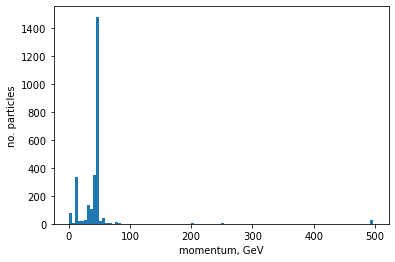

In [72]:
plt.hist(momentum,bins=100)
plt.xlabel('momentum, GeV')
plt.ylabel('no. particles');

### Find the momentum resolution of our experiment. Plot a 1D histogram to show the distribution for all reconstructed particles. [1 mark]

In [61]:
#get one theta value from pairs
theta_list = []
for i in range(len(pairs)):
    theta_list.append((pairs[i][1]+pairs[i][2])/2)

In [62]:
theta_list

[0.9283414999999999,
 2.213235,
 2.213235,
 2.213235,
 2.213235,
 2.213225,
 2.213225,
 2.212255,
 0.9293205,
 2.182455,
 0.9591485,
 0.9591485,
 0.959156,
 0.959173,
 0.9591795000000001,
 2.043775,
 1.0979899999999998,
 1.0979899999999998,
 1.097995,
 1.994535,
 1.147065,
 1.62832,
 1.62832,
 1.6283050000000001,
 1.628285,
 1.5131649999999999,
 1.5131649999999999,
 1.5131649999999999,
 1.5131700000000001,
 1.5131700000000001,
 1.5131800000000002,
 1.5131800000000002,
 1.46102,
 1.676945,
 0.880288,
 2.2612949999999996,
 1.29622,
 1.84535,
 2.29918,
 0.842397,
 1.821225,
 1.320295,
 1.417235,
 1.724375,
 1.348425,
 1.793215,
 0.933494,
 0.821886,
 1.88408,
 1.25747,
 1.742865,
 1.398655,
 1.89501,
 1.246565,
 1.246565,
 1.2465549999999999,
 1.2465600000000001,
 1.2465600000000001,
 1.24655,
 1.246545,
 1.07286,
 1.07286,
 1.0728499999999999,
 1.07282,
 1.0728149999999999,
 2.059215,
 1.78977,
 1.78977,
 1.78978,
 1.78979,
 1.7898,
 1.7897850000000002,
 1.351845,
 1.995095,
 1.146370000

In [63]:
#for thetas that are same/similar to truth value of theta, append the truth momentum
ptrue_list = []
for ID in pairID:
    truth_theta = truth.Theta[truth.EventID == ID]
    for j in truth_theta:
        for k in theta_list:
            if (math.fabs(j - k)<0.0001):
                ptrue = truth.momentum[ID]
    ptrue_list.append(ptrue)

In [66]:
resolution_list = (np.asarray(momentum) - np.asarray(ptrue_list))/np.asarray(ptrue_list)

Text(0, 0.5, 'no. particles')

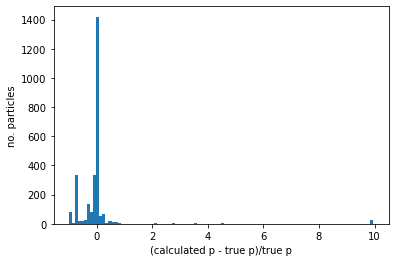

In [73]:
plt.hist(resolution_list,bins=100);
plt.xlabel('(calculated p - true p)/true p')
plt.ylabel('no. particles')

We reconstruct the mass of the decaying particle by adding the energies of our two reconstructed
particles. Because these are (light) muons with very high momenta, we can assume that their energies
are equivalent to their momenta. In this simple experiment we expect a roughly Gaussian distribution
for the total energy, with its mean value giving the decaying particle’s mass. The standard deviation of
this distribution would be the decay width of the particle, convolved with our experimental resolution.

Plot the total mass distribution. What was the original particle? Compare your results to
the PDG values for mass and width. [1 mark]

In [74]:
ptrue_list

[45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4958,
 45.4958,
 45.4958,
 45.4958,
 45.4958,
 45.4958,
 45.4958,
 45.4958,
 45.4958,
 45.4958,
 45.4958,
 45.4997,
 45.4997,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.2681,
 45.2681,
 45.4998,
 45.4998,
 45.4995,
 45.4995,
 45.4709,
 45.4709,
 45.4999,
 44.9694,
 45.4487,
 45.4487,
 45.4999,
 45.4999,
 45.4127,
 45.4127,
 45.4127,
 45.4127,
 45.4127,
 45.4127,
 45.4127,
 45.4127,
 45.4957,
 45.4957,
 45.4957,
 45.4957,
 45.4957,
 45.4957,
 45.4835,
 45.4835,
 45.4835,
 45.4835,
 45.4835,
 45.4835,
 45.4835,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.2,
 45.2,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4893,
 45.4893,
 45.4999,
 45.4999,
 45.4866,
 45.4866,
 45.4998,
 45.4998,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.4999,
 45.49

In [78]:
#get energies from truth momentum
etrue_list = []
for ID in pairID:
    truth_mom = truth.momentum[truth.EventID == ID]
    etrue_list.append(truth_mom.values)

In [79]:
#total energy is sum of two particles' energy
energies = []
for i in range(len(etrue_list)):
    energy = np.sum(etrue_list[i])
    energies.append(energy)

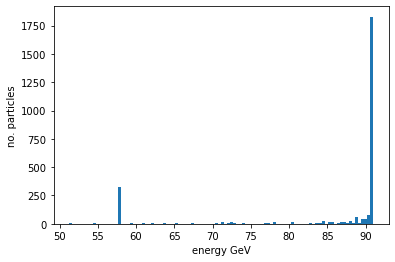

In [80]:
#this histogram shows a massive outlier
n, bins, hist = plt.hist(energies,bins=100);
plt.xlabel('energy GeV')
plt.ylabel('no. particles');

In [81]:
import scipy.stats as stats

In [82]:
mu, sigma = stats.norm.fit(energies,loc=0,scale=1)

In [83]:
mu, sigma

(85.28965802377417, 11.571553590499724)

In [231]:
#this 58GeV is an outlier, so i will cut this out by selecting energies above 80
#then look at the gaussian of the peak around 90GeV

In [85]:
e_new = np.asarray(energies)[np.asarray(energies)>80]

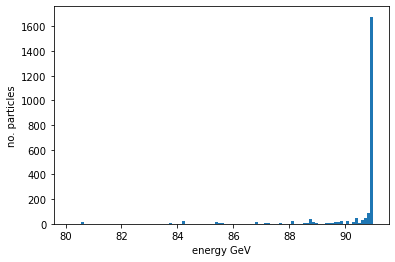

In [86]:
plt.hist(e_new,bins =100)
plt.xlabel('energy GeV')
plt.ylabel('no. particles');

In [87]:
mu, sigma = stats.norm.fit(e_new,loc=0,scale=1)

In [88]:
mu

90.45097864559818

In [89]:
sigma

1.5769121671877604

In [68]:
#this is a Z boson! Z has mass ~91 GeV and a width  ~2